In [1]:
#load Data
import pandas as pd
import re
import os

# List of file paths
file_paths = [
    'new0201-0.05', 'new0201-0.10','new0201-0.15','new0201-0.20','new0201-0.25','new0201-0.25','new0201-0.28','new0201-0.30'
    ,'new0201-0.33','new0201-0.35','new0201-0.38','new0201-0.40','new0201-0.43','new0201-0.45','new0201-0.48','new0201-0.50'
    ,'new0201-0.53','new0201-0.55','new0201-0.58','new0201-0.60','new0201-0.63','new0201-0.65','new0201-0.68','new0201-0.70'
    ,'new0201-0.73','new0201-0.75','new0201-0.78','new0201-0.80','new0201-0.83','new0201-0.85','new0201-0.88','new0201-0.90'
    ,'new0201-0.93','new0201-0.95','new0201-0.98','new0201-1.00','new0201-1.03','new0201-1.05','new0201-1.08', 'new0201-1.10'
    ,'new0201-1.13','new0201-1.15','new0201-1.18','new0201-1.20','new0201-1.23','new0201-1.25','new0201-1.28','new0201-1.30'
    ,'new0201-1.33','new0201-1.35','new0201-1.38','new0201-1.40','new0201-1.43','new0201-1.45','new0201-1.48','new0201-1.50'
    ,'new0201-1.53','new0201-1.55','new0201-1.58','new0201-1.60','new0201-1.63','new0201-1.65','new0201-1.68','new0201-1.70'
    ,'new0201-1.73','new0201-1.75','new0201-1.78','new0201-1.80','new0201-1.83','new0201-1.85','new0201-1.88','new0201-1.90'
    ,'new0201-1.93','new0201-1.95','new0201-1.98','new0201-2.00','new0201-2.03','new0201-2.05','new0201-2.08', 'new0201-2.10'
    ,'new0201-2.13','new0201-2.15','new0201-2.18','new0201-2.20','new0201-2.23','new0201-2.25','new0201-2.28','new0201-2.30'
    ,'new0201-2.33','new0201-2.35','new0201-2.38','new0201-2.40','new0201-2.43','new0201-2.45','new0201-2.48','new0201-2.50'
    ,'new0201-2.53','new0201-2.55','new0201-2.58','new0201-2.60','new0201-2.63','new0201-2.65','new0201-2.68','new0201-2.70'
    ,'new0201-2.73','new0201-2.75','new0201-2.78','new0201-2.80','new0201-2.83','new0201-2.85','new0201-2.88','new0201-2.90'
    ,'new0201-2.93','new0201-2.95','new0201-2.98','new0201-3.00','new0201-3.03','new0201-3.05','new0201-3.08', 'new0201-3.10'
    ,'new0201-3.13','new0201-3.15','new0201-3.18','new0201-3.20','new0201-3.23','new0201-3.25','new0201-3.28','new0201-3.30'
    ,'new0201-3.33','new0201-3.35','new0201-3.38','new0201-3.40','new0201-3.43','new0201-3.45','new0201-3.48','new0201-3.50'
    ,'new0201-3.53','new0201-3.55','new0201-3.58','new0201-3.60','new0201-3.63','new0201-3.65','new0201-3.68','new0201-3.70'
    ,'new0201-3.73','new0201-3.75','new0201-3.78','new0201-3.80','new0201-3.83','new0201-3.85','new0201-3.88','new0201-3.90'
    ,'new0201-3.93','new0201-3.95','new0201-3.98','new0201-4.00','new0201-4.03','new0201-4.05','new0201-4.08', 'new0201-4.10'
    ,'new0201-4.13','new0201-4.15','new0201-4.18','new0201-4.20','new0201-4.23','new0201-4.25','new0201-4.28','new0201-4.30'
    ,'new0201-4.33','new0201-4.35','new0201-4.38','new0201-4.40','new0201-4.43','new0201-4.45','new0201-4.48','new0201-4.50'
    ,'new0201-4.53','new0201-4.55','new0201-4.58','new0201-4.60','new0201-4.63','new0201-4.65','new0201-4.68','new0201-4.70'
    ,'new0201-4.73','new0201-4.75','new0201-4.78','new0201-4.80','new0201-4.83','new0201-4.85','new0201-4.88','new0201-4.90'
    ,'new0201-4.93','new0201-4.95','new0201-4.98','new0201-5.00', 
  
 
]

# Define a function to extract time from the file name
def extract_time(file_path):
    time_match = re.search(r'new0201-(\d+(\.\d+)?)', file_path)
    if time_match:
        time_value = float(time_match.group(1))
        return time_value
    else:
        return None

# Read and process each file
dfs = []
for file_path in file_paths:
    # Extract time from the file name
    time_value = extract_time(file_path)

    # Read the CSV file
    df = pd.read_csv(file_path, delimiter=',')  # Replace '\t' with the actual delimiter
    df['Time'] = time_value  # Set the time value for the new file

    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate the DataFrames along the time axis
combined_data = pd.concat(dfs, ignore_index=True)

# Filter the data
data_cleaned = combined_data[
    (combined_data['    x-coordinate'] >= -0.18) & (combined_data['    x-coordinate'] <= 0.18) &
    (combined_data['    y-coordinate'] >= -0.18) & (combined_data['    y-coordinate'] <= 0.18)
]

# Remove NaN values
data_cleaned = data_cleaned.dropna()

# Reset the index after filtering
#data_cleaned.reset_index(drop=True, inplace=True)
#data=data_cleaned
# Display the descriptive statistics of the cleaned data
data = data_cleaned.describe()
data

# Display the column names of the 'data' DataFrame
#print("Column Names:", data.columns)

,nodenumber,x-coordinate,y-coordinate,total-pressure,temperature,Time
count,2.087146e+06,2.087146e+06,2.087146e+06,2.087146e+06,2.087146e+06,2.087146e+06
mean,1.138049e+04,-1.168517e-02,-1.142992e-02,-3.704964e-02,3.012061e+02,2.528701e+00
std,4.154491e+03,9.817713e-02,9.934789e-02,2.127231e-01,1.298182e+00,1.424603e+00
min,4.192000e+03,-1.799995e-01,-1.799966e-01,-7.792792e+00,2.999841e+02,5.000000e-02
25%,7.796000e+03,-9.321270e-02,-9.671671e-02,-9.405147e-02,3.001049e+02,1.280000e+00
50%,1.136200e+04,-1.499498e-02,-1.185022e-02,-1.615674e-02,3.009438e+02,2.530000e+00
75%,1.491000e+04,6.763438e-02,6.982941e-02,5.639486e-02,3.016940e+02,3.750000e+00
max,2.121500e+04,1.799989e-01,1.799997e-01,1.699821e+00,3.109059e+02,5.000000e+00


In [22]:
#data split for the pressure and temperature models
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the target variable
y_p= data_cleaned[ '  total-pressure']
y_t= data_cleaned[ '     temperature']

# Define features, including time
X = data_cleaned[['Time', '    x-coordinate', '    y-coordinate']]

#-----------------------------------------------------------------
#model total-pressure
# Split the data into training and testing sets
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X, y_p, test_size=0.2, random_state=42)

#-----------------------------------------------------------------
#model temperature
#Split the data into training and testing sets
X_t_train, X_t_test, y_t_train, y_t_test = train_test_split(X, y_t, test_size=0.2, random_state=42)

In [11]:
#find the best brameter for the pressure model
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Define the parameter grid for grid search
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__gamma': [0.01, 0.1, 1],
    'svr__kernel': ['rbf', 'linear']
}

# Create the pipeline with StandardScaler and SVR
model_p_svm = make_pipeline(StandardScaler(), SVR())

# Perform grid search with cross-validation
grid_search_p = GridSearchCV(model_p_svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_p.fit(X_p_train, y_p_train)

# Get the best hyperparameters
best_params_p = grid_search_p.best_params_

# Train the model with the best hyperparameters
best_model_p = grid_search_p.best_estimator_
best_model_p.fit(X_p_train, y_p_train)

# Make predictions on the test set
y_p_pred_svm_best = best_model_p.predict(X_p_test)

# Evaluate the model
mse_p_svm_test_best = mean_squared_error(y_p_test, y_p_pred_svm_best)

print(f'Best Hyperparameters-pressure: {best_params_p}')
print(f'MSE on Test Set (SVM - Best Model)-pressure: {mse_p_svm_test_best}')


In [23]:
# ML model pressure
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#!pip install xgboost
import xgboost as xgb

#save!!
best_params_p= 0.01

# Create and train XGBoost model with best hyperparameters
model_p_xgb_best = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42, best_model_parameters=best_params_p)
model_p_xgb_best.fit(X_p_train, y_p_train)
model_p=model_p_xgb_best
# Make predictions on the test set
y_p_pred_xgb_best = model_p_xgb_best.predict(X_p_test)

# Evaluate the model
mse_p_xgb_test_best = mean_squared_error(y_p_test, y_p_pred_xgb_best)

print(f'MSE on Test Set (XGBoost - Best Model for pressure): {mse_p_xgb_test_best}')


c:\ProgramData\Anaconda3\envs\pivpy\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:10:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "best_model_parameters" } are not used.

  warnings.warn(smsg, UserWarning)


MSE on Test Set (XGBoost - Best Model for pressure): 0.002129667661097936


In [5]:
#find the best brameter for the temperature model
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Define the parameter grid for grid search
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__gamma': [0.01, 0.1, 1],
    'svr__kernel': ['rbf', 'linear']
}

# Create the pipeline with StandardScaler and SVR
model_t_svm = make_pipeline(StandardScaler(), SVR())

# Perform grid search with cross-validation
grid_search_t = GridSearchCV(model_t_svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_t.fit(X_t_train, y_t_train)

# Get the best hyperparameters
best_params_t = grid_search_t.best_params_

# Train the model with the best hyperparameters
best_model_t = grid_search_t.best_estimator_
best_model_t.fit(X_t_train, y_t_train)

# Make predictions on the test set
y_t_pred_svm_best = best_model_t.predict(X_t_test)

# Evaluate the model
mse_t_svm_test_best = mean_squared_error(y_t_test, y_t_pred_svm_best)

print(f'Best Hyperparameters-temperature: {best_params_t}')
print(f'MSE on Test Set (SVM - Best Model)-temperature: {mse_t_svm_test_best}')

Best Hyperparameters-temperature: {'svr__C': 10, 'svr__gamma': 0.01, 'svr__kernel': 'rbf'}
MSE on Test Set (SVM - Best Model)-temperature: 0.047991327435806905


In [26]:
#model temperature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

#save!!
best_params_t= 0.01

# Create and train XGBoost model with best hyperparameters
model_t_xgb_best = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42, best_params_t=best_params_t)
model_t_xgb_best.fit(X_t_train, y_t_train)
model_t=model_t_xgb_best
# Make predictions on the test set
y_t_pred_xgb_best = model_t_xgb_best.predict(X_t_test)

# Evaluate the model
mse_t_xgb_test_best = mean_squared_error(y_t_test, y_t_pred_xgb_best)

print(f'MSE on Test Set (XGBoost - Best Model for temperature): {mse_t_xgb_test_best}')

c:\ProgramData\Anaconda3\envs\pivpy\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:12:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "best_params_t" } are not used.

  warnings.warn(smsg, UserWarning)


MSE on Test Set (XGBoost - Best Model for temperature): 0.0317503803752089


In [39]:
# Load New Data and compare with the predictions
import pandas as pd
import re
import os

# List of file paths
file_paths = [
    'sim2712-8.41'
]

# Define a function to extract time from the file name
def extract_time(file_path):
    time_match = re.search(r'sim2712-(\d+(\.\d+)?)', file_path)
    if time_match:
        time_value = float(time_match.group(1))
        return time_value
    else:
        return None

# Read and process each file
dfss_list = []
for file_path in file_paths:
    # Extract time from the file name
    time_value = extract_time(file_path)

    # Read the CSV file
    dfss = pd.read_csv(file_path, delimiter=',')  # Replace '\t' with the actual delimiter
    dfss['Time'] = time_value  # Set the time value for the new file

    # Append the DataFrame to the list
    dfss_list.append(dfss)

# Concatenate the DataFrames along the time axis
New_data = pd.concat(dfss_list, ignore_index=True)

# Filter the data
New_data_cleaned = New_data[
    (New_data['    x-coordinate'] >= -0.18) & (New_data['    x-coordinate'] <= 0.18) &
    (New_data['    y-coordinate'] >= -0.18) & (New_data['    y-coordinate'] <= 0.18)
]

# Reset the index after filtering
New_data_cleaned.reset_index(drop=True, inplace=True)
data_101 = New_data_cleaned.dropna()
data_101
# Display the descriptive statistics of the cleaned data
#dfss_stats = New_data_cleaned.describe()
#dfss_stats


,nodenumber,x-coordinate,y-coordinate,total-pressure,temperature,Time
0,4181,-0.064765,-0.179967,0.118880,306.063857,8.41
1,4182,0.104128,-0.179955,0.028596,306.728081,8.41
2,4183,-0.053138,-0.179946,0.123795,306.040349,8.41
3,4184,-0.114300,-0.179906,0.094625,306.197619,8.41
4,4185,-0.040298,-0.179892,0.129552,306.018615,8.41
...,...,...,...,...,...,...
10210,18244,-0.119346,0.179852,-0.024542,306.823907,8.41
10211,18245,0.149751,0.179866,0.207795,306.767554,8.41
10212,18248,-0.086666,0.179945,-0.023734,306.553692,8.41
10213,18249,0.072140,0.179973,0.269448,306.866396,8.41


In [40]:
#make pridections in a spesific time
import pandas as pd
from sklearn.metrics import mean_squared_error

# Simulate data for a specific time and within the specified range
specific_time = 8.41  # Update with your desired time

compare=data_101
# Add the specific time to the "compare" DataFrame
compare['Time'] = specific_time

# Use the trained model to predict the target variable for the coordinates and specific time in the "compare" table
X_compare = compare[['Time', '    x-coordinate', '    y-coordinate']]
y_compare_pred = model_p.predict(X_compare)
y_t_compare_pred = model_t.predict(X_compare)

# Add predicted values to the "compare" DataFrame
compare['Predicted_p_Value'] = y_compare_pred
compare['Predicted_t_Value'] = y_t_compare_pred

compare.drop('Time', axis=1, inplace=True)


# Calculate root mean squared error and add a new column for pressure predictions
compare['mean_squared_error_p'] = mean_squared_error(compare['  total-pressure'],compare['Predicted_p_Value'])
compare['sqrt_square_error_p'] = (((compare['  total-pressure']-compare['Predicted_p_Value']))**2)**0.5
compare['relative_p_error_%']= ((compare['  total-pressure']-compare['Predicted_p_Value'])/(compare['  total-pressure']))*100

# Calculate root mean squared error and add a new column for temperature predictions
compare['mean_squared_error_t'] = mean_squared_error(compare['     temperature'],compare['Predicted_t_Value'])
compare['sqrt_square_error_t'] = (((compare['     temperature']-compare['Predicted_t_Value']))**2)**0.5
compare['relative_t_error_%'] =((compare['     temperature']-compare['Predicted_t_Value'])/(compare['     temperature']))*100

# Display the column names of the 'data' DataFrame
#print("Column Names:", compare.columns)
error=compare.describe() 
#error
compare['sqrt_square_error_t']

0        4.326980
1        0.128944
2        4.243749
3        4.547656
4        4.200195
           ...   
10210    3.897027
10211    0.579383
10212    3.342296
10213    2.575075
10214    0.487239
Name: sqrt_square_error_t, Length: 10215, dtype: float64

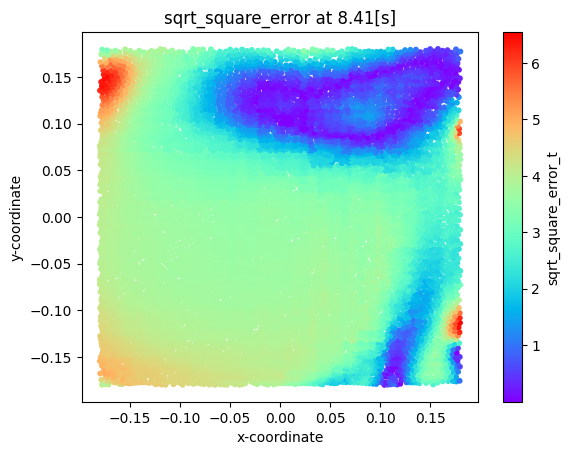

In [42]:
#plot the sqrt_square_error field in a specific_time
#by using the dataframe
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the values of the 'sqrt_square_error_t' column as colors
y_points_t = compare['sqrt_square_error_t'].values

# Plot the predicted index of refraction field using a rainbow colormap
plt.scatter(compare['    x-coordinate'], compare['    y-coordinate'], c=y_points_t, cmap='rainbow', s=10)
plt.colorbar(label='sqrt_square_error_t')
plt.title('sqrt_square_error at 8.41[s]')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()


In [2]:
# add index of refraction to the data using our equation

df = data_cleaned.dropna()
#caluclations
some_coefficient = 1.00034
another_coefficient = 3.576 * (10 ** -10)


#df['  total-pressure'] = (data_cleaned['  total-pressure'])
#df['     temperature'] = (data_cleaned['     temperature'])

# Add a new column using the specified equation
df['index_of_refraction'] = some_coefficient - (another_coefficient * ((df['  total-pressure']) / df['     temperature']))
df['change_in_peco_index_of_refraction'] = ((df['index_of_refraction'])-some_coefficient)*10**12
#pd.to_numeric
# Display the updated DataFrame
df



,nodenumber,x-coordinate,y-coordinate,total-pressure,temperature,Time,index_of_refraction,change_in_peco_index_of_refraction
4247,4248,-0.064765,-0.179967,-0.104291,300.001585,0.05,1.00034,0.124345
4248,4249,-0.053138,-0.179946,-0.092713,300.001570,0.05,1.00034,0.110578
4249,4250,0.107360,-0.179942,0.089553,300.001583,0.05,1.00034,-0.106803
4250,4251,-0.114300,-0.179906,-0.146284,300.002076,0.05,1.00034,0.174305
4251,4252,-0.040298,-0.179892,-0.079121,300.001649,0.05,1.00034,0.094369
...,...,...,...,...,...,...,...,...
4118462,18369,-0.059817,0.179777,0.003036,303.661699,5.00,1.00034,-0.003553
4118463,18370,-0.154048,0.179802,-0.000819,303.981690,5.00,1.00034,0.000888
4118465,18372,-0.127840,0.179901,0.006045,303.015353,5.00,1.00034,-0.007105
4118466,18373,0.007592,0.179930,-0.124653,304.071375,5.00,1.00034,0.146549


In [3]:
#data split for the pressure and temperature models
import pandas as pd
from sklearn.model_selection import train_test_split



# Define the target variable
y_n= df['change_in_peco_index_of_refraction']


# Define features, including time
X = df[['Time', '    x-coordinate', '    y-coordinate']]


#-----------------------------------------------------------------
#model index of refraction
# Split the data into training and testing sets
X_n_train, X_n_test, y_n_train, y_n_test = train_test_split(X, y_n, test_size=0.2, random_state=42)
y_n_train


269930     0.362377
1340215    0.413225
1225084    0.046407
2145981    0.012434
2942270   -0.124567
             ...   
507722    -0.024203
2791608    0.345945
261208    -0.011990
1318969    0.061506
240686     0.097256
Name: change_in_peco_index_of_refraction, Length: 1669716, dtype: float64

In [4]:
#find the best brameter for the change_in_peco_index_of_refraction model
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline

# Define the parameter grid for grid search
param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__gamma': [0.01, 0.1, 1],
    'svr__kernel': ['rbf', 'linear']
}

# Create the pipeline with StandardScaler and SVR
model_n_svm = make_pipeline(StandardScaler(), SVR())

# Perform grid search with cross-validation
grid_search_n = GridSearchCV(model_n_svm, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_n.fit(X_n_train, y_n_train)

# Get the best hyperparameters
best_params_n = grid_search_n.best_params_

# Train the model with the best hyperparameters
best_model_n = grid_search_n.best_estimator_
best_model_n.fit(X_n_train, y_n_train)

# Make predictions on the test set
y_n_pred_svm_best = best_model_n.predict(X_n_test)

# Evaluate the model
mse_n_svm_test_best = mean_squared_error(y_n_test, y_n_pred_svm_best)

print(f'Best Hyperparameters-change_in_peco_index_of_refraction: {best_params_n}')
print(f'MSE on Test Set (SVM - Best Model)-change_in_peco_index_of_refraction: {mse_n_svm_test_best}')

In [4]:
#model index of refraction
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

#save!!
best_params_n= 0.01

# Create and train XGBoost model with best hyperparameters
model_n_xgb_best = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42, best_params_t=best_params_n)
model_n_xgb_best.fit(X_n_train, y_n_train)
model_n=model_n_xgb_best
# Make predictions on the test set
y_n_pred_xgb_best = model_n_xgb_best.predict(X_n_test)

# Evaluate the model
mse_n_xgb_test_best = mean_squared_error(y_n_test, y_n_pred_xgb_best)

print(f'MSE on Test Set (XGBoost - Best Model for change index of refraction): {mse_n_xgb_test_best}')

c:\ProgramData\Anaconda3\envs\pivpy\Lib\site-packages\xgboost\core.py:160: UserWarning: [19:42:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "best_params_t" } are not used.

  warnings.warn(smsg, UserWarning)


MSE on Test Set (XGBoost - Best Model for change index of refraction): 0.0028769879362569705


In [5]:
#make pridection of the value of index of refraction depending on time and coordinates
# Define new data for prediction (replace this with your actual data)
new_data = pd.DataFrame({
    'Time': [1.25, 1.30, 1.35],  # Add the time values for prediction
    '    x-coordinate': [0.1, 0.05, -0.2],  # Add x-coordinate values for prediction
    '    y-coordinate': [-0.15, 0.1, 0.05]  # Add y-coordinate values for prediction
})

# Make predictions using the trained model
predictions = model_n.predict(new_data)

# Display the predictions
print("Predictions for Index of Refraction:")
print(predictions)


Predictions for Index of Refraction:
[-0.03559048 -0.2203757  -0.20129366]


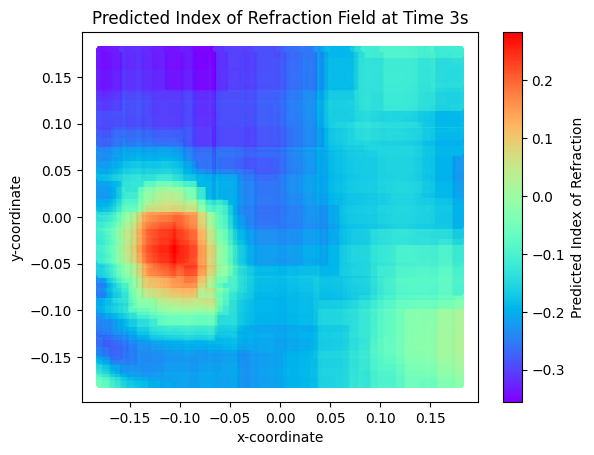

In [7]:
#plot the pridected index of refraction field in a specific_time
#by biulding a grid of points
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simulate data for a specific time and within the specified range
specific_time = 3  # Update with your desired time

# Create a DataFrame with simulated data for the specific time and range
x_range = np.linspace(-0.18, 0.18, 5000)  # Adjust the number of points as needed
y_range = np.linspace(-0.18, 0.18, 5000)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

simulated_data = pd.DataFrame({
    '    x-coordinate': x_mesh.flatten(),
    '    y-coordinate': y_mesh.flatten(),
    'Time': specific_time
})


# Use the trained model to predict the target variable for the simulated data
X_simulated = simulated_data[['Time', '    x-coordinate', '    y-coordinate']]
y_simulated_pred = model_n.predict(X_simulated)

# Plot the predicted index of refraction field using a rainbow colormap
plt.scatter(simulated_data['    x-coordinate'], simulated_data['    y-coordinate'], c=y_simulated_pred, cmap='rainbow', s=10)
plt.colorbar(label='Predicted Index of Refraction')
plt.title(f'Predicted Index of Refraction Field at Time {specific_time}s')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()

C:\Users\PIV\AppData\Local\Temp\ipykernel_17552\3523823359.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_points['Time'] = specific_time  # Set the specific time for predictions


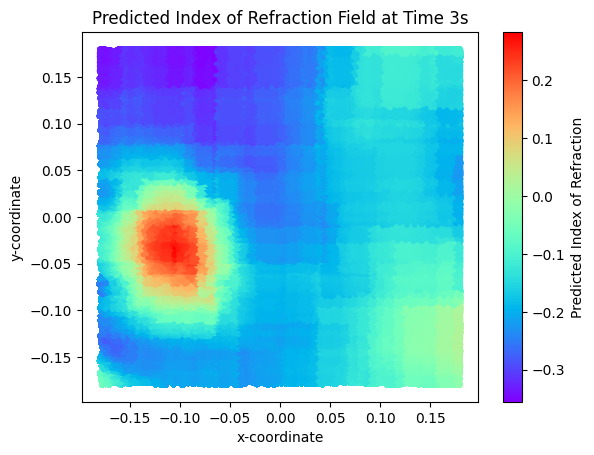

In [8]:
#plot the pridected index of refraction field in a specific_time
#by using the dataframe

# Use the trained model to predict the target variable for the points in the DataFrame 'df' at the specific time
X_points = df[['Time', '    x-coordinate', '    y-coordinate']]
X_points['Time'] = specific_time  # Set the specific time for predictions
y_points_pred = model_n.predict(X_points)

# Plot the predicted index of refraction field using a rainbow colormap
plt.scatter(df['    x-coordinate'], df['    y-coordinate'], c=y_points_pred, cmap='rainbow', s=10)
plt.colorbar(label='Predicted Index of Refraction')
plt.title(f'Predicted Index of Refraction Field at Time {specific_time}s')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()




Coefficients: [-6.33709557e-05  5.82153912e-01  1.17074072e+00  1.85874456e+00
 -9.47737977e-01  1.24626602e+00 -2.83361065e-01 -2.11902763e+01
 -6.91769749e+00  1.13686220e+01  6.04649592e-01 -1.07062432e+00
 -1.39461219e+00  4.86562922e+01  3.15074926e+01 -4.24514227e+01
 -2.56502246e+02 -8.26815922e+01  7.73286576e+01 -5.88970849e+01
 -1.93601020e-01  1.60295739e-01  8.81658417e-01 -1.34519429e+01
 -1.35757112e+01  2.51950862e+01 -5.24480097e+01 -1.08819321e+02
  8.34519048e+01  5.26247989e+01  7.80350906e+02 -7.95815162e+02
 -1.63072263e+03 -3.05718827e+02  6.15318395e+02  3.08497548e-02
 -6.15134986e-03 -2.15129813e-01  1.64774108e+00  3.11266307e+00
 -5.88182259e+00  7.00011977e+01  5.90695182e+01 -3.61886471e+01
  4.52211168e+00 -1.36627143e+03 -1.12432241e+02 -5.14079753e+02
 -7.31320452e+02  3.46451437e+02  4.77944004e+03  5.95438575e+03
  9.01776859e+03  1.85694957e+03 -7.61045154e+03 -9.03714627e+01
 -1.92817575e-03  3.49144002e-04  1.84055387e-02 -1.53105528e-01
 -2.9426563

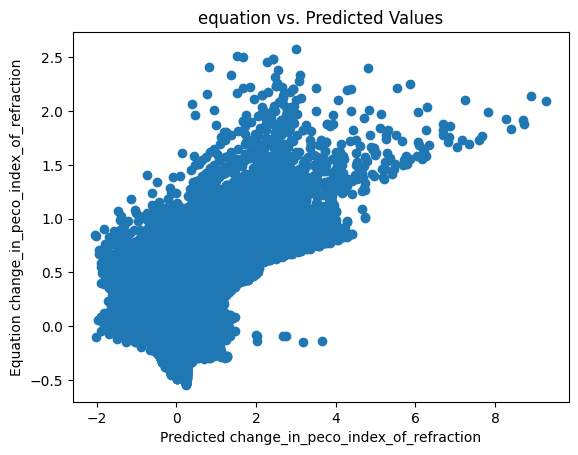

In [17]:
#change n in peco equation using polynomial
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, max_error

# Assuming you have a DataFrame 'df' with features and the target variable 'change_in_peco_index_of_refraction'
M = df[['Time', '    x-coordinate', '    y-coordinate']]
n = df['change_in_peco_index_of_refraction']

# Set the degree of the polynomial
degree = 6  # You can adjust this based on the complexity of the relationship

# Create a polynomial regression model
regression_ch_n_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
regression_ch_n_model.fit(M, n)

# Make predictions
n_ch_n_pred = regression_ch_n_model.predict(M)

# Print the coefficients (including polynomial terms) and intercept
coefficients_ch_n = regression_ch_n_model.named_steps['linearregression'].coef_
intercep_ch_n = regression_ch_n_model.named_steps['linearregression'].intercept_

print('Coefficients:', coefficients_ch_n)
print('Intercept:', intercep_ch_n)

# Calculate Mean Squared Error (MSE)
mse_ch_n = mean_squared_error(y_true=n, y_pred=n_ch_n_pred)
print('Mean Squared Error:', mse_ch_n)

# Calculate R-squared
r2_ch_n = r2_score(y_true=n, y_pred=n_ch_n_pred)
print('R-squared:', r2_ch_n)

# Calculate Max Error
max_err_ch_n = max_error(y_true=n, y_pred=n_ch_n_pred)
print('Max Error:', max_err_ch_n)

# Print the equation
equation_ch_n = f"{intercep_ch_n}"
for i, coef in enumerate(coefficients_ch_n):
    equation_ch_n += f" + ({coef:.4f} * X[{i}])"
print('Equation:', equation_ch_n)

# Visualize the actual vs. predicted values
# Visualize the actual vs. predicted values
plt.scatter (n, n_ch_n_pred)
plt.xlabel('Predicted change_in_peco_index_of_refraction')
plt.ylabel('Equation change_in_peco_index_of_refraction')
plt.title('equation vs. Predicted Values')
plt.show()


In [21]:
#change n in peco equation using Neural Networks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, max_error

# Assuming you have a DataFrame 'df' with features and the target variable 'change_in_peco_index_of_refraction'
M = df[['Time', 'x-coordinate', 'y-coordinate']]
n = df['change_in_peco_index_of_refraction']

# Split the data into training and testing sets
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
M_train_scaled = scaler.fit_transform(M_train)
M_test_scaled = scaler.transform(M_test)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(M_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(M_train_scaled, n_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the test set
n_pred = model.predict(M_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_true=n_test, y_pred=n_pred)
r2 = r2_score(y_true=n_test, y_pred=n_pred)
max_err = max_error(y_true=n_test, y_pred=n_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('Max Error:', max_err)

# Visualize the actual vs. predicted values
plt.scatter(n_test, n_pred)
plt.xlabel('Actual change_in_peco_index_of_refraction')
plt.ylabel('Predicted change_in_peco_index_of_refraction')
plt.title('Actual vs. Predicted Values')
plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [29]:
# derivative  equation
#!pip install sympy
import sympy as sp

# Build the polynomial using NumPy
polynomial = np.polynomial.Polynomial(coefficients_ch_n)

# Create the symbolic expression
equation = sum(c * X[i] for i, c in enumerate(coefficients_ch_n))

# Calculate derivatives for all variables
derivatives = [sp.diff(equation, x) for x in X]

# Print the derivative equations
for i, derivative in enumerate(derivatives):
    print(f"The derivative of the equation with respect to X[{i}] is: {sp.printing.latex(derivative)}")


The derivative of the equation with respect to X[0] is: -6.33709557138842 \cdot 10^{-5}
The derivative of the equation with respect to X[1] is: 0.582153912447957
The derivative of the equation with respect to X[2] is: 1.17074071561291
The derivative of the equation with respect to X[3] is: 1.85874455706189
The derivative of the equation with respect to X[4] is: -0.947737976970374
The derivative of the equation with respect to X[5] is: 1.24626601661497
The derivative of the equation with respect to X[6] is: -0.283361065385626
The derivative of the equation with respect to X[7] is: -21.190276282035
The derivative of the equation with respect to X[8] is: -6.91769748773995
The derivative of the equation with respect to X[9] is: 11.3686219981066
The derivative of the equation with respect to X[10] is: 0.604649591684043
The derivative of the equation with respect to X[11] is: -1.07062431590557
The derivative of the equation with respect to X[12] is: -1.39461219156984
The derivative of the eq